# Logistics回归分类

没有隐藏层的神经网络。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py


### 获取数据

In [2]:
# 训练集数据
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_dataset.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [3]:
train_set_x_orig = np.array(train_dataset['train_set_x'])
train_set_y_orig = np.array(train_dataset['train_set_y'])

In [4]:
train_dataset['list_classes'][:]

array([b'non-cat', b'cat'], dtype='|S7')

In [5]:
# 测试集数据
test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset['test_set_x'])
test_set_y_orig = np.array(test_dataset['test_set_y'])

classes = np.array(test_dataset['list_classes'][:])

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))


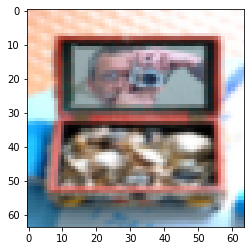

In [6]:
plt.imshow(train_set_x_orig[15])

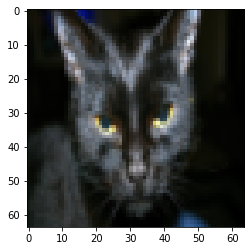

In [7]:
plt.imshow(train_set_x_orig[25])

In [55]:
# train_set_y_orig
train_set_y_orig[:, 25]

array([1], dtype=int64)

In [13]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [15]:
m_train = train_set_y_orig.shape[1]
m_test = test_set_y_orig.shape[1]
num_px = train_set_x_orig.shape[1]
num_px

64

In [17]:
print("训练集数量：m_train = " + str(m_train))
print("测试集的数量：m_test = " + str(m_test))
print("每张图片的宽/高：num_px = " + str(num_px))
print("每张图片的大小：（" + str(num_px) + "," + str(num_px))
print("训练集_图片的维数：" + str(train_set_x_orig.shape))
print("训练集_标签的维数："+ str(train_set_y_orig.shape))
print("测试集_图片的维数：" + str(test_set_x_orig.shape))
print("测试集_标签的维数："+ str(test_set_y_orig.shape))

训练集数量：m_train = 209
测试集的数量：m_test = 50
每张图片的宽/高：num_px = 64
每张图片的大小：（64,64
训练集_图片的维数：(209, 64, 64, 3)
训练集_标签的维数：(1, 209)
测试集_图片的维数：(50, 64, 64, 3)
测试集_标签的维数：(1, 50)


In [18]:
# (a, b, c, d)的矩阵平铺成(b * c * d, a)的矩阵
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [19]:
print ("训练集降维最后的维度： " + str(train_set_x_flatten.shape))
print ("训练集_标签的维数 : " + str(train_set_y_orig.shape))
print ("测试集降维之后的维度: " + str(test_set_x_flatten.shape))
print ("测试集_标签的维数 : " + str(test_set_y_orig.shape))


训练集降维最后的维度： (12288, 209)
训练集_标签的维数 : (1, 209)
测试集降维之后的维度: (12288, 50)
测试集_标签的维数 : (1, 50)


In [20]:
# 将彩色图像预处理，类似数据的归一化，彩色图像直接到[0, 1]区间
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

对于$x^{i}$，有$$z^{i} = w^Tx^{i} + b$$ $$\hat{y}^{i} = a^{i} = sigmoid(z^{i})$$ 
$$L(a^{i}, y^{i}) = -y^{i}log(a^{i} - (1-y^{i})log(1-a^{i})$$
$$J = \frac{1}{m}\sum_{i=1}^{m}L(a^{i}, y^{i})$$

In [21]:
# 构建sigmoid函数
def sigmoid(z):
    return 1/(1 + np.exp(-z))

sigmoid(0)

0.5

In [22]:
# 初始化参数w和b
def initialize_w_b(dim):
    w = np.random.randn(dim, 1)*0.01
    b = 0
    # 使用断言判断维度
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return (w, b)

In [28]:
# 前向传播和后向传播
# 计算成本函数及梯度
def propagate(w, b, X, Y):
    """
    实现前向和后向传播的成本函数及其梯度。
    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 矩阵类型为（num_px * num_px * 3，训练数量）
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据数量)

    返回：
        cost- 逻辑回归的负对数似然成本
        dw  - 相对于w的损失梯度，因此与w相同的形状
        db  - 相对于b的损失梯度，因此与b的形状相同
    """
    m = X.shape[1]
    
    # 正向传播
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y)* (np.log(1 - A)))
    
    # 反向传播
    dw = (1/m)*np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)
    
    # 使用断言确保数据正确
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw, 'db':db}
    
    return (grads, cost)

In [39]:
# 梯度下降更新参数
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    此函数通过运行梯度下降算法来优化w和b
    
    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数组。
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
        num_iterations  - 优化循环的迭代次数
        learning_rate  - 梯度下降更新规则的学习率
        print_cost  - 每100步打印一次损失值
    
    返回：
        params  - 包含权重w和偏差b的字典
        grads  - 包含权重和偏差相对于成本函数的梯度的字典
        成本 - 优化期间计算的所有成本列表，将用于绘制学习曲线。
    
    提示：
    我们需要写下两个步骤并遍历它们：
        1）计算当前参数的成本和梯度，使用propagate（）。
        2）使用w和b的梯度下降法则更新参数。
    """
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            
        if(print_cost) and (i % 100 == 0):
            print("迭代的次数：%i， 误差值： %f" % (i, cost))
        
    params = {"w":w, "b":b}
    grads = {"dw": dw, "db": db}
        
    return (params, grads, costs)

In [32]:
print("=================测试optimize===============")
w, b, X, Y  = np.array([[1], [2]]), 2, np.array([[1,2],[3, 4]]), np.array([[1, 0]])
optimize(w, b, X, Y, 100, 0.001, False)

=================测试optimize===============


({'w': array([[0.99900007],
         [1.9980002 ]]),
  'b': 1.9995000647693753},
 {'dw': array([[0.99993216],
         [1.99980262]]),
  'db': 0.49993523062470574},
 [6.000064773192205])

In [40]:
# 上面过程已经输出学习过的w和b，预测数据集标签
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [41]:
def model(X_train , Y_train , X_test , Y_test , num_iterations = 2000 , learning_rate = 0.5 , print_cost = False):
    """
    通过调用之前实现的函数来构建逻辑回归模型
    
    参数：
        X_train  - numpy的数组,维度为（num_px * num_px * 3，m_train）的训练集
        Y_train  - numpy的数组,维度为（1，m_train）（矢量）的训练标签集
        X_test   - numpy的数组,维度为（num_px * num_px * 3，m_test）的测试集
        Y_test   - numpy的数组,维度为（1，m_test）的（向量）的测试标签集
        num_iterations  - 表示用于优化参数的迭代次数的超参数
        learning_rate  - 表示optimize（）更新规则中使用的学习速率的超参数
        print_cost  - 设置为true以每100次迭代打印成本
    
    返回：
        d  - 包含有关模型信息的字典。
    """
    w , b = initialize_w_b(X_train.shape[0])
    
    parameters , grads , costs = optimize(w , b , X_train , Y_train,num_iterations , learning_rate , print_cost)
    
    #从字典“参数”中检索参数w和b
    w , b = parameters["w"] , parameters["b"]
    
    #预测测试/训练集的例子
    Y_prediction_test = predict(w , b, X_test)
    Y_prediction_train = predict(w , b, X_train)
    
    #打印训练后的准确性
    print("训练集准确性："  , format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100) ,"%")
    print("测试集准确性："  , format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100) ,"%")
    
    d = {
            "costs" : costs,
            "Y_prediction_test" : Y_prediction_test,
            "Y_prediciton_train" : Y_prediction_train,
            "w" : w,
            "b" : b,
            "learning_rate" : learning_rate,
            "num_iterations" : num_iterations }
    return d


In [50]:
d = model(train_set_x, train_set_y_orig, test_set_x, test_set_y_orig, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

迭代的次数：0， 误差值： 0.731776
迭代的次数：100， 误差值： 0.579494
迭代的次数：200， 误差值： 0.460630
迭代的次数：300， 误差值： 0.370231
迭代的次数：400， 误差值： 0.328143
迭代的次数：500， 误差值： 0.300201
迭代的次数：600， 误差值： 0.277064
迭代的次数：700， 误差值： 0.257469
迭代的次数：800， 误差值： 0.240588
迭代的次数：900， 误差值： 0.225848
迭代的次数：1000， 误差值： 0.212839
迭代的次数：1100， 误差值： 0.201255
迭代的次数：1200， 误差值： 0.190860
迭代的次数：1300， 误差值： 0.181474
迭代的次数：1400， 误差值： 0.172952
迭代的次数：1500， 误差值： 0.165175
迭代的次数：1600， 误差值： 0.158049
迭代的次数：1700， 误差值： 0.151495
迭代的次数：1800， 误差值： 0.145444
迭代的次数：1900， 误差值： 0.139842
训练集准确性： 99.04306220095694 %
测试集准确性： 70.0 %


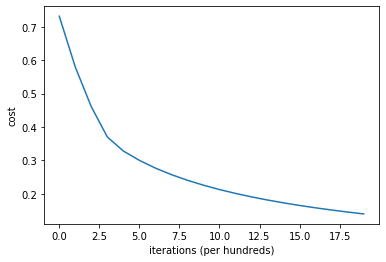

In [53]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
# plt.title("Learning rate =" + str('learning_rate'))
plt.show()
